# Employee Analysis

## Using SQLAlechemy analyze the data from SQL

In [4]:
# import sqlachemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from config import key

In [5]:
#set up connection to SQL database
engine = create_engine(f'postgresql://{key}localhost:5432/employee_DB')
connection = engine.connect()

In [6]:
# Import Matplot lib and pandas
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# get table names for database
inspector = inspect(engine)
table_names = inspector.get_table_names()
table_names

['titles',
 'employees',
 'departments',
 'dept_manager',
 'dept_employee',
 'salaries']

In [8]:
# get column names for each table
for t in table_names:
    columns = inspector.get_columns(t)
    print("...")
    print(f"Table: {t}")
    for c in columns:
        print(c['name'], c["type"])

...
Table: titles
title_id VARCHAR(5)
title VARCHAR(20)
...
Table: employees
employee_number INTEGER
employee_title_id VARCHAR(5)
birth_date DATE
first_name VARCHAR(30)
last_name VARCHAR(30)
sex VARCHAR(1)
hire_date DATE
...
Table: departments
dept_number VARCHAR(4)
dept_name VARCHAR(20)
...
Table: dept_manager
dept_number VARCHAR(5)
employee_number INTEGER
...
Table: dept_employee
employee_number INTEGER
dept_number VARCHAR(5)
...
Table: salaries
employee_number INTEGER
salary INTEGER


In [9]:
# Base = automap_base()
# Base.prepare(engine, reflect=True)
# Titles = Base.classes.titles
# Employees = Base.classes.employees
# #Salaries = Base.classes.salaries

In [10]:
# session = Session(engine)

In [11]:
Salary = pd.read_sql("SELECT * FROM salaries", connection)
Salary

,employee_number,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [12]:
Titles = pd.read_sql("SELECT * FROM titles", connection)
Titles

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [13]:
Employees = pd.read_sql("SELECT * FROM employees", connection)
Employees

,employee_number,employee_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


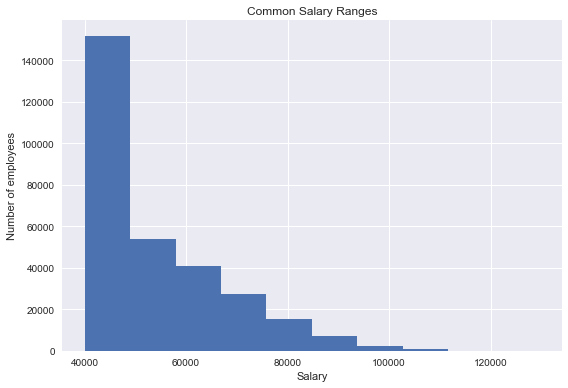

<Figure size 576x396 with 0 Axes>

In [14]:
# histogram of most common salary ranges for employees
x = Salary["salary"]
fig, ax = plt.subplots()
ax.hist(x)
ax.set_xlabel("Salary")
ax.set_ylabel("Number of employees")
ax.set_title("Common Salary Ranges")
fig.tight_layout()
plt.show()
matplotlib.pyplot.savefig("Common_Salary_Ranges")

In [15]:
#

In [16]:
#find employee with ID number 499942
emp_499942 = Employees.loc[Employees["employee_number"]==499942]
emp_499942

,employee_number,employee_title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10


In [17]:
#close session
session.close()

NameError: name 'session' is not defined